In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import warnings
warnings.filterwarnings('ignore')

In [2]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/MyDrive/Data_XY_c.csv'
data = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
from tensorflow import keras as ks
model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  2))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.softsign))
model.add(ks.layers.Dense(209, activation=ks.activations.softmax))
model.add(ks.layers.Dense(211, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid))

In [9]:
model.compile(  optimizer=ks.optimizers.Adam(), 
              loss = ks.losses.binary_crossentropy, 
              metrics = 'acc')

In [22]:
x = data.iloc[:,[64, 84]]
x = np.array(x)
y = data['y']
for i in range (0,100):
  y[i]=0
for i in range (100,700):
  y[i]=1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state= 0)
history = model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0376 - acc: 0.9943
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0042 - acc: 0.9981
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0123 - acc: 0.9981
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0175 - acc: 0.9962
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - acc: 0.9924
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0065 - acc: 0.9981
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.9981
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0024 - acc: 1.0000
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0099 - acc: 0.9962
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0041 - acc: 1.0000
Epoch 11/100
18/18 [==============================] - 0s 2m

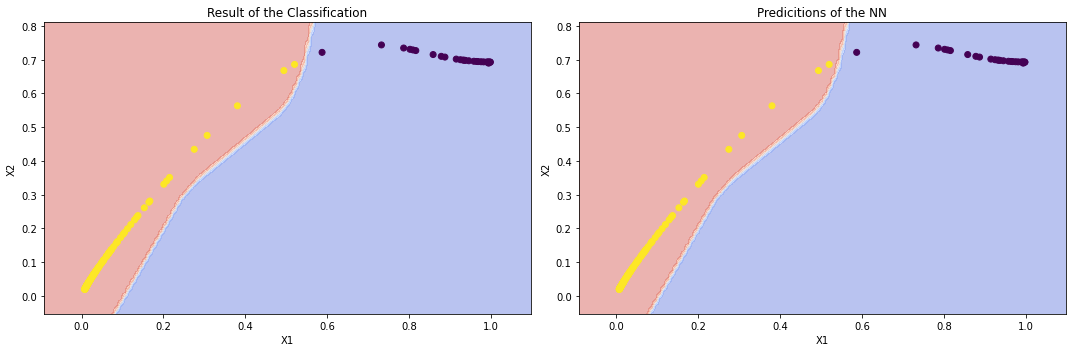

In [23]:
y_predict = (model.predict(x_test)>.5).astype(int)

x1_list, x2_list = grid(x[:,0], x[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*x_test.T, c=y_test)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'X1', ylabel='X2', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
plt.scatter(*x_test.T, c = y_predict.reshape(-1))


plt.tight_layout()
plt.show()

In [24]:
x = data.iloc[:,[14, 69]]
x = np.array(x)
y = data['y']
for i in range (0,100):
  y[i]=0
for i in range (100,700):
  y[i]=1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state= 0)
history = model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0170 - acc: 0.9962
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0210 - acc: 0.9962
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 2.5398e-04 - acc: 1.0000
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 3.9112e-04 - acc: 1.0000
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 2.2814e-04 - acc: 1.0000
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 2.1456e-04 - acc: 1.0000
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.9885e-04 - acc: 1.0000
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.8378e-04 - acc: 1.0000
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.7373e-04 - acc: 1.0000
Epoch 11/100
18/18 [===========

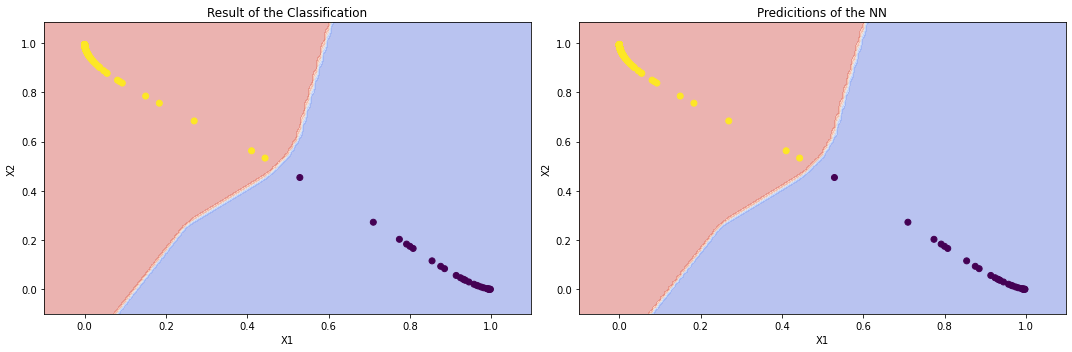

In [25]:
y_predict = (model.predict(x_test)>.5).astype(int)

x1_list, x2_list = grid(x[:,0], x[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*x_test.T, c=y_test)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'X1', ylabel='X2', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
plt.scatter(*x_test.T, c = y_predict.reshape(-1))


plt.tight_layout()
plt.show()

In [26]:
x = data.iloc[:,[4, 78]]
x = np.array(x)
y = data['y']
for i in range (0,100):
  y[i]=0
for i in range (100,700):
  y[i]=1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state= 0)
history = model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1194 - acc: 0.9829
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1953 - acc: 0.9657
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0319 - acc: 0.9924
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0302 - acc: 0.9943
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0288 - acc: 0.9943
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0288 - acc: 0.9962
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0275 - acc: 0.9962
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0269 - acc: 0.9962
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0271 - acc: 0.9962
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0268 - acc: 0.9962
Epoch 11/100
18/18 [==============================] - 0s 2m

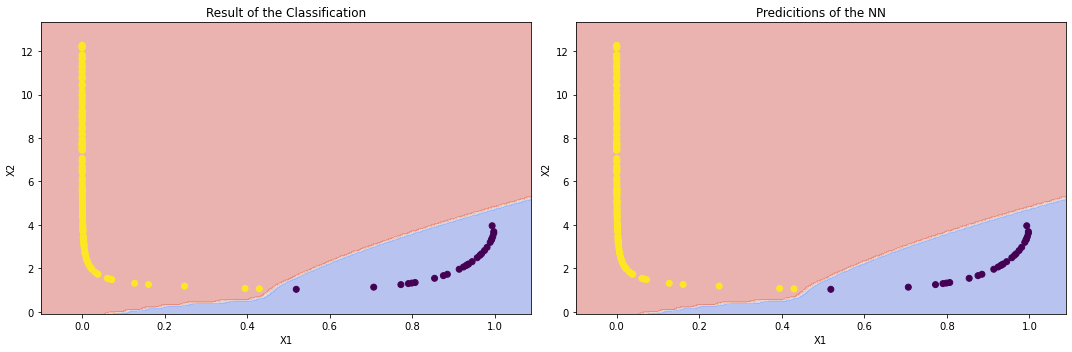

In [27]:
y_predict = (model.predict(x_test)>.5).astype(int)

x1_list, x2_list = grid(x[:,0], x[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*x_test.T, c=y_test)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'X1', ylabel='X2', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
plt.scatter(*x_test.T, c = y_predict.reshape(-1))


plt.tight_layout()
plt.show()

In [28]:
x = data.iloc[:,[24, 44]]
x = np.array(x)
y = data['y']
for i in range (0,100):
  y[i]=0
for i in range (100,700):
  y[i]=1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state= 0)
history = model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0842 - acc: 0.9829
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0241 - acc: 0.9962
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0227 - acc: 0.9962
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0221 - acc: 0.9943
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0210 - acc: 0.9962
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.9962
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0193 - acc: 0.9962
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0189 - acc: 0.9962
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0203 - acc: 0.9962
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0191 - acc: 0.9943
Epoch 11/100
18/18 [==============================] - 0s 2m

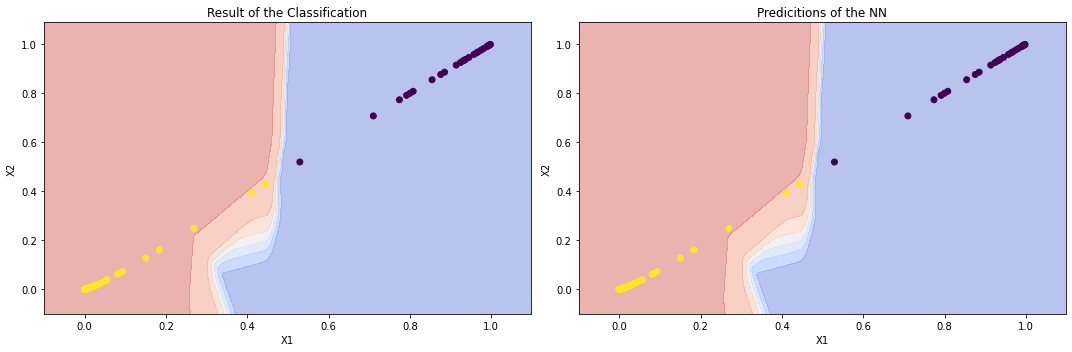

In [29]:
y_predict = (model.predict(x_test)>.5).astype(int)

x1_list, x2_list = grid(x[:,0], x[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'X1', ylabel='X2', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*x_test.T, c=y_test)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'X1', ylabel='X2', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
plt.scatter(*x_test.T, c = y_predict.reshape(-1))


plt.tight_layout()
plt.show()